# Perceptron

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

print(np.__version__)
print(torch.__version__)

1.19.2
1.7.1


## Preparing the Data

### Loading the Dataset

In [2]:
data = np.genfromtxt("data.txt")
data.shape

(100, 3)

In [3]:
X, Y = data[:, :2], data[:, 2]
Y = Y.astype(np.int)

In [4]:
print(np.bincount(Y)) # binary count
print(f"X shape {X.shape}")
print(f"Y shape {Y.shape}")

[50 50]
X shape (100, 2)
Y shape (100,)


### Spliting the data 

In [5]:
shuffle_idx = np.arange(Y.shape[0])
print(len(shuffle_idx))

100


In [6]:
np.random.shuffle(shuffle_idx)
print(len(shuffle_idx))

100


In [7]:
X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
Y_train, Y_test = Y[shuffle_idx[:70]], Y[shuffle_idx[70:]]

In [8]:
X_train.shape

(70, 2)

### Normalized the data 
- using the mean and std of X_train

In [9]:
X_mean, X_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
print(f"mean={X_mean}, std={X_std}")

mean=[0.13542857 0.37857143], std=[2.13919924 2.1265131 ]


In [10]:
X_train = (X_train - X_mean)/X_std
X_test = (X_test - X_mean)/X_std

In [11]:
X_mean, X_std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
print(f"mean={X_mean}, std={X_std}")

mean=[-3.17206578e-17  2.53765263e-17], std=[1. 1.]


In [12]:
Y_test

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1])

### Visualizing the datapoints

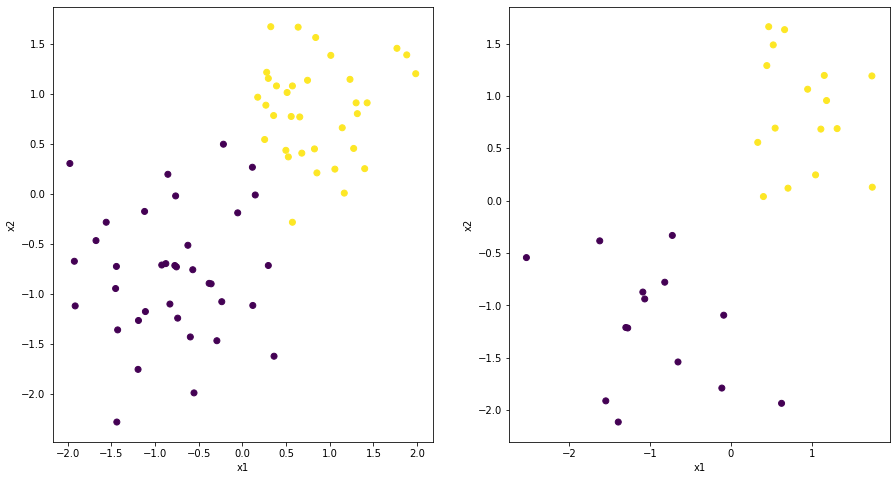

In [13]:
fig, axs = plt.subplots(1,2,figsize=(15,8))

axs[0].scatter(X_train[:,0], X_train[:,1],c=Y_train)
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")

axs[1].scatter(X_test[:,0], X_test[:,1],c=Y_test)
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")

plt.show()

### From numpy to Tensor 

In [198]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
print(X_train_tensor.shape)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train)
Y_test_tensor = torch.tensor(Y_test)
print(Y_test_tensor.shape)

torch.Size([70, 2])
torch.Size([30])


## Creating the Perceptron Class
- Using Torch

In [199]:
class Perceptron():
    def __init__(self, no_of_features):
        self.n_features = no_of_features
        self.weights = torch.zeros((self.n_features, 1), dtype=torch.float64)
        self.bias = torch.ones((1),dtype=torch.float64)
           
    def forward(self,x):
        preds = torch.mm(x.reshape(1,self.n_features), self.weights) + self.bias
        preds = (preds > 0).int()
#         print(preds)
        return preds
    
    def backward(self,x,y):
#         print(x.reshape(1,self.n_features))
        preds = self.forward(x)
        error = (y - preds).sum()
#         print(error)
        self.weights = self.weights + (error*x).reshape(self.n_features, 1)
        self.bias = self.bias + error
        
    def train(self, x, y, epochs=1):
        for epoch in range(epochs):
            for xi, yi in zip(x,y):
                self.backward(xi,yi)
                
    def evaluate(self,x_test,y_test):
        match = 0
        for xi,yi in zip(x_test,y_test):
            y_hat = self.forward(xi)
            if y_hat == yi:
                match += 1
        print(f"Accuracy is {match/y_test.shape[0] * 100:.2f}")

#### Class to send batch of training data

In [343]:
class Perceptron_Batch():
    def __init__(self, no_of_features):
        self.n_features = no_of_features
        self.weights = torch.zeros((self.n_features, 1), dtype=torch.float32)
        self.bias = torch.ones((1),dtype=torch.float32)
           
    def forward(self,x):
        preds = x @ self.weights + self.bias
#         preds = torch.mm(x.reshape(1,self.n_features), self.weights) + self.bias

        preds = (preds > 0).float()
#         print(preds)
        return preds.reshape(-1)
    
    def backward(self,x,y):
#         print(x.reshape(1,self.n_features))
        preds = self.forward(x)
#         print(preds.shape)
        error = y - preds  #.sum()
        factor =  error @ x / x.shape[0]
#         print(error.shape)
        self.weights = self.weights + factor.reshape(self.n_features, 1)
        self.bias = self.bias + error.sum()
        
    def train(self, x, y, epochs=1):
        for epoch in range(epochs):
#             for xi, yi in zip(x,y):
            self.backward(x,y)
                
    def evaluate(self,x_test,y_test):
        match = 0
        y_hat = self.forward(x_test)
        matched = (y_test==y_hat).float()
        
        #         for xi,yi in zip(x_test,y_test):
#             y_hat = self.forward(xi)
#             if y_hat == yi:
#                 match += 1
        print(f"Accuracy is {matched.sum()/y_test.shape[0] * 100:.2f}")

In [321]:
p = Perceptron_Batch(2)
# p = Perceptron(2)
print(p.weights.shape)
print(p.bias.shape)

torch.Size([2, 1])
torch.Size([1])


In [322]:
p.weights + factor.reshape(2,1)

tensor([[0.0764],
        [0.0622]])

In [323]:
Y_preds = X_train_tensor @ p.weights + p.bias
Y_preds = (Y_preds>0).float()
Y_preds.shape

torch.Size([70, 1])

In [324]:
Y_train_tensor.shape

torch.Size([70])

In [302]:
error = Y_train_tensor - Y_preds.reshape(-1)
print(error.shape)
print(error.sum())
error

torch.Size([70])
tensor(10.)


tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [303]:
factor = error @ X_train_tensor / X_train_tensor.shape[0]
print(factor.shape)
factor

torch.Size([2])


tensor([0.0764, 0.0622])

### Training the model

In [372]:
p = Perceptron_Batch(2)
# p = Perceptron(2)
print(p.weights.shape)
print(p.bias.shape)

torch.Size([2, 1])
torch.Size([1])


In [373]:
p.train(X_train_tensor,Y_train_tensor, 40)

### Evaluating the model
- On test and train dataset

In [374]:
p.evaluate(X_test_tensor, Y_test_tensor)

Accuracy is 100.00


In [375]:
p.evaluate(X_train_tensor, Y_train_tensor)

Accuracy is 98.57


### Looking into weight and bias

In [376]:
print(p.weights)
print(p.bias)

tensor([[6.8562],
        [6.7058]])
tensor([-3.])


In [377]:
p.weights[1].item()

6.705840110778809

In [378]:
p.bias[0].item()

-3.0

### Plotting the boundary line

In [379]:
x1_0 = -2
x2_0 = (-x1_0*p.weights[0].item() - p.bias[0].item())/p.weights[1].item()
x2_0

2.492210502243947

In [380]:
x1_1 = 2
x2_1 = (-x1_1*p.weights[0].item() - p.bias[0].item())/p.weights[1].item()
x2_1

-1.5974680239143875

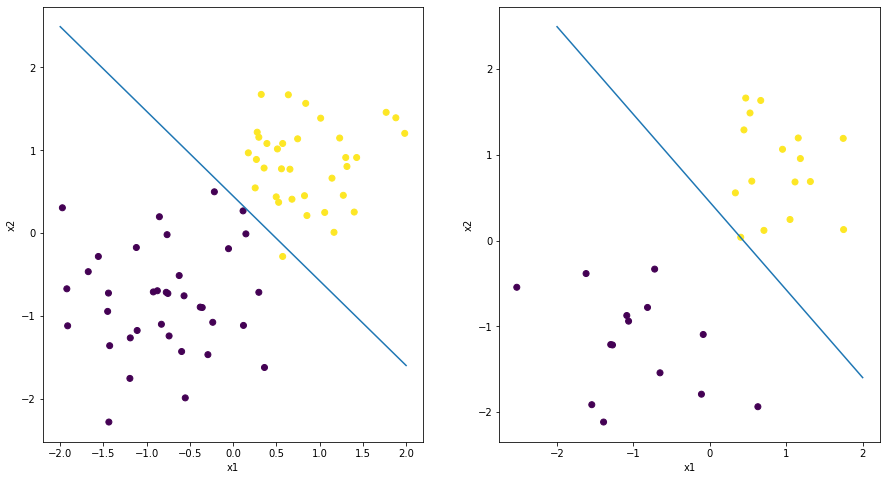

In [381]:

fig, axs = plt.subplots(1,2,figsize=(15,8))

axs[0].scatter(X_train[:,0], X_train[:,1],c=Y_train)
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].plot([x1_0,x1_1],[x2_0,x2_1]) # the line coordinates

axs[1].scatter(X_test[:,0], X_test[:,1],c=Y_test)
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].plot([x1_0,x1_1],[x2_0,x2_1])

plt.show()